# Import Libraries

In [80]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# Load the data and Transfrom

In [62]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))]
)
batch_size = 4

train_dataset = torchvision.datasets.CIFAR10(root='./data',train=True,transform=transform,download=True)
train_loader = torch.utils.data.DataLoader(train_dataset,batch_size=batch_size,shuffle= True,num_workers=2)

test_dataset = torchvision.datasets.CIFAR10(root='./data',train=False, transform =transform,download=True)
test_loader = torch.utils.data.DataLoader(test_dataset,batch_size=batch_size,shuffle=True,num_workers=2)

100%|██████████| 170498071/170498071 [00:05<00:00, 29328949.68it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [66]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

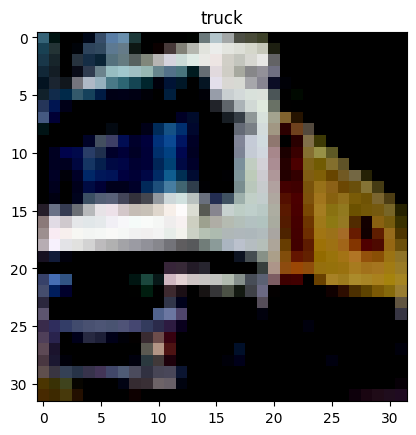

In [74]:
image,label = train_dataset[1]
plt.imshow(image.permute(1,2,0))
plt.title(train_dataset.classes[label])
plt.show()

# Convolution Network

In [85]:
class ConvolutionNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(3, 6, 5)
    self.pool = nn.MaxPool2d(2,2)
    self.conv2 = nn.Conv2d(6,16,5)
    self.fc1 = nn.Linear(16*5*5,120)
    self.fc2 = nn.Linear(120,84)
    self.fc3 = nn.Linear(84,10)
  def forward(self,x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = torch.flatten(x,1)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x
model = ConvolutionNetwork()

# Define Loss function

In [86]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(),lr=0.001,momentum=0.9)

# Training Neural Network

In [87]:
for epoch in range(2):
  current_loss = 0.0
  for i,data in enumerate(train_loader,0):
    inputs,labels = data
    optimizer.zero_grad()
    y_pred = model(inputs)
    loss = loss_fn(y_pred,labels)
    loss.backward()
    optimizer.step()

    current_loss += loss.item()

    if i%2000 == 1999:
          print(f'[{epoch + 1}, {i + 1:5d}] loss: {current_loss / 2000:.3f}')
          current_loss = 0.0
print("Finished Training")


[1,  2000] loss: 2.201
[1,  4000] loss: 1.870
[1,  6000] loss: 1.672
[1,  8000] loss: 1.577
[1, 10000] loss: 1.518
[1, 12000] loss: 1.478
[2,  2000] loss: 1.382
[2,  4000] loss: 1.359
[2,  6000] loss: 1.337
[2,  8000] loss: 1.297
[2, 10000] loss: 1.277
[2, 12000] loss: 1.258
Finished Training


# Save the model

In [91]:
PATH = './cifar_model.pth'
torch.save(model.state_dict(),PATH)

# Test the network on the test data

In [92]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

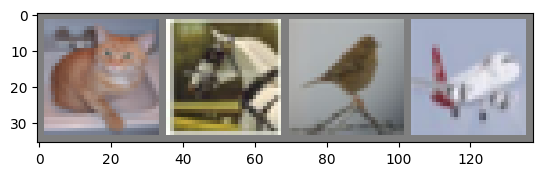

GroundTruth:  cat   horse bird  plane


In [89]:
dataiterator = iter(test_loader)
images,labels = next(dataiterator)

imshow(torchvision.utils.make_grid(images))

print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

# Load the saved model

In [93]:
model_2 = ConvolutionNetwork()
model_2.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [94]:
output = model_2(images)

# Model performance on Test Dataset

In [95]:
correct = 0
total = 0

with torch.no_grad():
  for data in test_loader:
    images,labels = data
    out = model_2(images)
    _,predicted = torch.max(out.data,1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 55 %
